In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
A = np.matrix([[2,0], [0,3]])
evals, evecs = np.linalg.eig(A)
evals #eigenvalues, lambda1 = 2, lambda2 = 3

array([2., 3.])

In [5]:
evecs #eigenvectors

matrix([[1., 0.],
        [0., 1.]])

In [6]:
A = np.matrix([[1, 0.3], [0.45, 1.2]])
evals, evecs = np.linalg.eig(A)
evals #eigenvalues

array([0.71921134, 1.48078866])

In [7]:
evecs #eigenvectors

matrix([[-0.73009717, -0.52937334],
        [ 0.68334334, -0.84838898]])

In [15]:
#Create gradient to visualize these values
x_v1, y_v1 = evecs[:,0].getA1()
x_v2, y_v2 = evecs[:,1].getA1()
m1 = y_v1/x_v1 # Gradient of 1st eigenvector
m2 = y_v2/x_v2 # Gradient of 2nd eigenvector
print(m1, m2)

(-0.9359621843106516, 1.602628850977318)


In [48]:
import numpy as np
import matplotlib.pyplot as plt

def plot_points(matrix, ls='--', lw=1.2, colors=None):
    x_points, y_points = matrix
    size = len(x_points)
    colors = ['red', 'blue', 'orange', 'green'] if not None else colors
    for i in range(size):
        plt.plot(x_points[i], y_points[i], color=colors[i], marker='o')
        plt.plot([x_points[i], x_points[(i+1) % size]], 
                 [y_points[i], y_points[(i+1) % size]], 
                 color=colors[i], linestyle=ls, linewidth=lw)
        
def plot_point_label(prefix, point, location):
    plt.annotate('{0}={1}'.format(prefix, tuple(map(lambda x: round(x, 2), point))), 
    xy=point, xytext=location, textcoords='data', color='white', weight='semibold',
    bbox=dict(fc='navy', alpha=0.6, ec='none'), arrowprops=dict(arrowstyle='->'))

In [39]:
import numpy as np
import matplotlib.pyplot as plt

A = np.matrix([[1, 0.3], [0.45, 1.2]])
matrix = np.matrix([[-10, -10, 20, 20], [-10, 20, 20, -10]])
transformed_matrix = A * matrix


plot_points(matrix)
plot_points(transformed_matrix.A, '-', lw=3.0)
evals, evecs = np.linalg.eig(A)

x_v1, y_v1 = evecs[:,0].getA1()
x_v2, y_v2 = evecs[:,1].getA1()
m1 = y_v1/x_v1  # Gradient of 1st eigenvector
m2 = y_v2/x_v2  # Gradient of 2nd eigenvector

p1 = [-10/m1, -10]  # 1st point at y = -10
p2 = [20/m2, 20]    # 2nd point at y = -20
trans_p1 = A*np.matrix(p1).T
trans_p2 = A*np.matrix(p2).T

# Plot eigenvectors and labels
plt.plot([x_v1*-50, x_v1*50], [y_v1*-50, y_v1*50], color='royalblue')
plt.plot([x_v2*-50, x_v2*50], [y_v2*-50, y_v2*50], color='crimson')
plt.annotate('e1', xy=(-20, 14),textcoords='data', weight='semibold', color='royalblue')
plt.annotate('e2', xy=(-11, -20),textcoords='data', weight='semibold', color='crimson')

# Plot the points where the eigenvector line and original points intersect
plt.plot(p1[0], p1[1], 'ko')
plt.plot(p2[0], p2[1], 'ko')

# Plot the transformed points that lie on the eigenvector line
plt.plot(trans_p1[0,0], trans_p1[1,0], 'ko')
plt.plot(trans_p2[0,0], trans_p2[1,0], 'ko')

# Plot the point labels
plot_point_label('p1', p1, (12, -19))
plot_point_label('T(p1)', trans_p1.A1, (18, -13))
plot_point_label('p2', p2, (-14, 26))
plot_point_label('T(p2)', trans_p2.A1, (-6, 33))

# Set the axes
ax = plt.axes() 
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_aspect('equal')

# Limit the plot
plt.xlim([-20, 30])
plt.ylim([-20, 35])
plt.show()

ValueError: x and y can be no greater than 2-D, but have shapes (2, 1, 4) and (2, 1, 4)

In [27]:
matrix.shape

(2, 4)

In [28]:
A.shape

(2, 2)

In [29]:
A * matrix

matrix([[-13. ,  -4. ,  26. ,  17. ],
        [-16.5,  19.5,  33. ,  -3. ]])

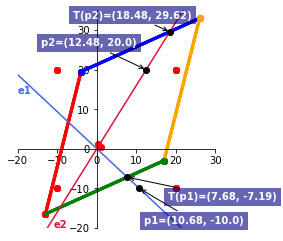

In [54]:
plot_points(transformed_matrix.A, '-', lw=3.0)
evals, evecs = np.linalg.eig(A)

p1 = [-10/m1, -10]  # 1st point at y = -10
p2 = [20/m2, 20]    # 2nd point at y = -20
trans_p1 = A*np.matrix(p1).T
trans_p2 = A*np.matrix(p2).T

plt.plot([x_v1*-50, x_v1*50], [y_v1*-50, y_v1*50], color='royalblue')
plt.plot([x_v2*-50, x_v2*50], [y_v2*-50, y_v2*50], color='crimson')
plt.annotate('e1', xy=(-20, 14),textcoords='data', weight='semibold', color='royalblue')
plt.annotate('e2', xy=(-11, -20),textcoords='data', weight='semibold', color='crimson')

plt.plot(p1[0], p1[1], 'ko')
plt.plot(p2[0], p2[1], 'ko')

plt.plot(trans_p1[0,0], trans_p1[1,0], 'ko')
plt.plot(trans_p2[0,0], trans_p2[1,0], 'ko')

plot_point_label('p1', p1, (12, -19))
plot_point_label('T(p1)', trans_p1.A1, (18, -13))
plot_point_label('p2', p2, (-14, 26))
plot_point_label('T(p2)', trans_p2.A1, (-6, 33))

ax = plt.axes() 
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_aspect('equal')

plt.xlim([-20, 30])
plt.ylim([-20, 35])
plt.show()

In [42]:
A = np.matrix([[1, 0.3], [0.45, 1.2]])
matrix = np.matrix([[-10, -10, 20, 20], [-10, 20, 20, -10]])
transformed_matrix = A * matrix
transformed_matrix

matrix([[-13. ,  -4. ,  26. ,  17. ],
        [-16.5,  19.5,  33. ,  -3. ]])